
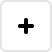
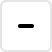
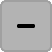
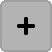
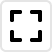
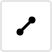
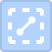
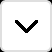
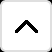
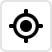
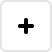
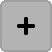
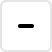
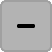
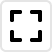
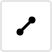
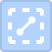
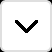
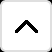
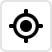

In [1]:
import numpy as np

from lets_plot.mapping import as_discrete
from lets_plot import *

LetsPlot.setup_html()

In [2]:
np.random.seed(1)

n = 10
x = list(range(n))
y1 = np.random.rand(n)
y2 = np.random.rand(n)

#### Short form

In [3]:
ggplot() + \
    geom_point(aes('x', 'y'), data={'x': x, 'y': y1}, color='red', shape=21, show_key="Red zone") + \
    geom_line(aes('x', 'y'), data={'x': x, 'y': y2}, color='blue', linetype=2, show_key="Blue zone") + \
    geom_rect(xmin=6, xmax=8, ymin=0.7, ymax=0.8, fill='green', alpha=0.2, show_key="Green zone") + \
    geom_label(label="Text", x=8, y=0, fill='orange', color='white', size=8, show_key="Orange zone")

#### Parameterized form

In [4]:
p = ggplot() + \
    geom_point(aes('x', 'y'), data={'x': x, 'y': y1}, color='red', shape=21, 
               show_key=layer_key(label="Red zone", index=0)) + \
    geom_line(aes('x', 'y'), data={'x': x, 'y': y2}, color='blue', linetype=2, 
               show_key=layer_key(label="Blue zone", index=2)) + \
    geom_rect(xmin=6, xmax=8, ymin=0.7, ymax=0.8, fill='green', alpha=0.2,
               show_key=layer_key(label="Green zone", index=1, alpha=1)) +\
    geom_label(label="Text", x=8, y=0, fill='orange', color='white', size=8, 
               show_key=layer_key(label="Orange zone", index=4, color='black'))
p

In [5]:
# Use legend key

ggplot() + \
    geom_point(aes('x', 'y'), data={'x': x, 'y': y1}, color='red', shape=21, 
               show_key=layer_key(label="Red zone", key="Key1")) + \
    geom_line(aes('x', 'y'), data={'x': x, 'y': y2}, color='blue', linetype=2, 
               show_key=layer_key(label="Blue zone", key="Key1")) + \
    geom_rect(xmin=6, xmax=8, ymin=0.7, ymax=0.8, fill='green', alpha=0.2,
               show_key=layer_key(label="Green zone", key="Key2", alpha=1)) + \
    geom_label(label="Text", x=8, y=0, fill='orange', color='white', size=8, 
               show_key=layer_key(label="Orange zone", key="Key3", color='black'))

#### Append items to 'color' legend

In [6]:
ggplot() + \
    geom_point(aes('x', 'y', color=as_discrete('x')), data={'x': x, 'y': y1},
               show_key=layer_key(key='color', label="point", shape=21)) + \
    geom_line(aes('x', 'y'), data={'x': x, 'y': y2},               
              linetype=4,
              color='blue', 
              show_key=layer_key(key='color', label="line")) + \
    guides(color=guide_legend(ncol=2)) + \
    labs(color='New title')

#### Guide options

In [7]:
p + guides(custom_key=guide_legend(title="My legend", nrow=2)) + theme(legend_position='bottom')

#### Change legend title using `labs()`

In [8]:
# Generates 'guides' in spec

p_with_labs = p + labs(legend_custom_key="Zones")

print(p_with_labs.as_dict()['guides'])
p_with_labs

{'custom_key': {'name': 'legend', 'title': 'Zones'}}


In [9]:
# Not merge 'guides'

p_with_labs = p_with_labs + guides(custom_key=guide_legend(ncol=2))

print(p_with_labs.as_dict()['guides'])
p_with_labs

{'custom_key': {'name': 'legend', 'ncol': 2}}


#### Ways to set a title

In [10]:
(ggplot()
    + geom_point(aes('x', 'y', color=as_discrete('x')), data={'x': x, 'y': y1})
    + guides(color=guide_legend(title="guide's legend title")) 
    + labs(color="from labs()")
    + scale_color_discrete(name="scale name")
)

In [11]:
(ggplot()
    + geom_point(aes('x', 'y', color=as_discrete('x')), data={'x': x, 'y': y1})
#    + guides(color=guide_legend(title="guide's legend title")) 
    + labs(color="from labs()")
    + scale_color_discrete(name="scale name")
)

In [12]:
(ggplot()
    + geom_point(aes('x', 'y', color=as_discrete('x')), data={'x': x, 'y': y1})
#    + guides(color=guide_legend(title="guide's legend title")) 
    + labs(color="from labs()")
#    + scale_color_discrete(name="scale name")
)